# Masking

Shreya Tripathi
22BAI10033

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Start video capture (webcam)
cap = cv2.VideoCapture(0)

# Check if webcam is opened successfully
if not cap.isOpened():
    print("Error: Cannot access webcam.")
    exit()

# Set up matplotlib interactive mode
plt.ion()

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert the frame from BGR to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the color to mask (skin tone color range)
    low = np.array([0, 20, 70])  # Lower bound of skin tone colors in HSV
    high = np.array([20, 255, 255])  # Upper bound of skin tone colors in HSV

    # Create the mask based on the specified color range
    image_mask = cv2.inRange(hsv, low, high)

    # Apply the mask to the original frame using bitwise AND
    output = cv2.bitwise_and(frame, frame, mask=image_mask)

    # Display the original frame and the masked output using matplotlib
    plt.figure(figsize=(10, 5))

    # Original Frame
    plt.subplot(1, 2, 1)
    plt.title('Original Frame')
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')

    # Masked Output
    plt.subplot(1, 2, 2)
    plt.title('Masked Output')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')

    # Display the images
    display(plt.gcf())
    plt.pause(0.01)  # Pause to allow image display
    clear_output(wait=True)  # Clear the output for the next frame

    # Check if 'q' key was pressed for exit (manual method)
    user_input = input("Press 'q' and Enter to quit, or any other key to continue: ")
    if user_input.lower() == 'q':
        break

# Release the capture object
cap.release()
plt.close()  # Close the plot window

Press 'q' and Enter to quit, or any other key to continue: q


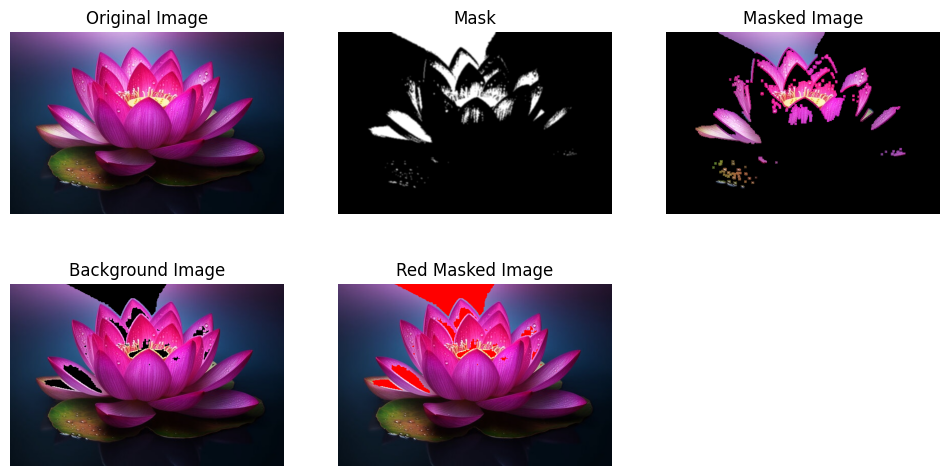

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('lotus.jpg')  # Replace 'image.jpg' with your image file

# Convert the image to grayscale (necessary for creating a mask)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
# You can change the threshold value to adjust the sensitivity
_, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Optional: Apply a Gaussian blur to the mask to smooth out the edges
mask = cv2.GaussianBlur(mask, (5, 5), 0)

# Create an inverse mask
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image
# Use bitwise AND operation to keep only the region of interest (ROI)
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Apply the inverse mask to the original image (keep the rest of the image unchanged)
background = cv2.bitwise_and(img, img, mask=mask_inv)

# You can also perform operations on the masked area, e.g., changing color of masked area
# Here, I will change the masked area to red
red_img = img.copy()
red_img[mask == 255] = [0, 0, 255]  # Set the masked region to red

# # Display all results
# cv2.imshow('Original Image', img)
# cv2.imshow('Mask', mask)
# cv2.imshow('Masked Image', masked_img)
# cv2.imshow('Background Image', background)
# cv2.imshow('Red Masked Image', red_img)

# # Wait for a key press and close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()



# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Mask
plt.subplot(2, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

# Masked Image
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.axis('off')

# Background Image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')

# Red Masked Image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
plt.title('Red Masked Image')
plt.axis('off')

# Show the plot
plt.show()